# Diabetes detection using NN

File : pima-indians-diabetes.csv (Kaggle)

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

1. preg = Number of times pregnant

2. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. pres = Diastolic blood pressure (mm Hg)

4. skin = Triceps skin fold thickness (mm)

5. test = 2-Hour serum insulin (mu U/ml)

6. mass = Body mass index (weight in kg/(height in m)^2)

7. pedi = Diabetes pedigree function

8. age = Age (years)

9. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

## Train

In [9]:
# train.py

from numpy import loadtxt # handle/load dataset

from tensorflow.keras.models import Sequential # Empty working area
from tensorflow.keras.layers import Dense	# Dense layer
from tensorflow.keras.layers import BatchNormalization

dataset = loadtxt('pima-indians-diabetes.csv',delimiter=',')
x = dataset[:,0:8]
y = dataset[:,8]
print(x)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [29]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid')) # one neuron (Classification : 0 or 1)

from tensorflow.keras.optimizers import SGD

#opt = SGD(lr=0.003)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x,y, validation_split=0.33, epochs=100, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

_, accuracy = model.evaluate(x,y)
print('Accuracy : %.2f' % (accuracy*100))



dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
24/24 [==============================] - 0s 2ms/step - loss: 0.4710 - acc: 0.7643
Accuracy : 76.43


Accuracy is: 76.43229166666666
Predicted Class: 0 (Original Class: 0)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 1 (Original Class: 0)
Predicted Class: 1 (Original Class: 1)
Predicted Class: 0 (Original Class: 1)


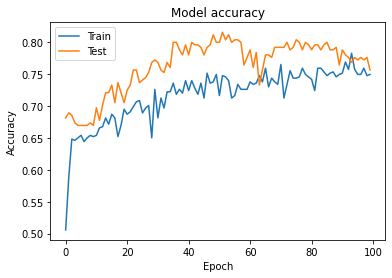

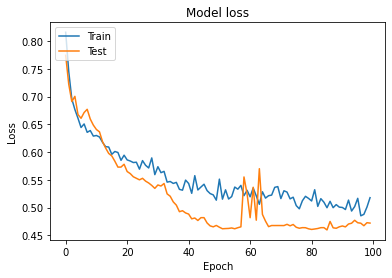

In [30]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(x)
pred = list()
for i in range(len(y_pred)):
  pred.append(np.round(y_pred[i]))
test = y
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

# function below removed from tensorflow 2.6
# predictions = model.predict_classes(x, verbose=0)
predict_x = model.predict(x) 
predictions=np.round(predict_x)

for i in range(5,10):
  print('Predicted Class: %d (Original Class: %d)' % (predictions[i], y[i]))

# Graphical Representation of Accuracy & Loss Graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
# function removed from tensorflow 2.6
# predictions = model.predict_classes(x, verbose=0)

predict_x = model.predict(x) 
predictions=np.round(predict_x)

for i in range(5,10):
  print('Predicted Class: %d (Original Class: %d)' % (predictions[i], y[i]))

model_json = model.to_json()
with open("model.json","w") as json_file :
  json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")


Predicted Class: 0 (Original Class: 0)
Predicted Class: 0 (Original Class: 1)
Predicted Class: 1 (Original Class: 0)
Predicted Class: 1 (Original Class: 1)
Predicted Class: 0 (Original Class: 1)
Saved model to disk


## Test

In [22]:
import numpy as np
from numpy import loadtxt
from tensorflow.keras.models import model_from_json

dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
x = dataset[:,0:8]
y = dataset[:,8]

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
print("Loaded model from disk")

predictions = model.predict(x)
print(predictions[5:10])  # idem to range below, print before round()
predictions = np.round(predictions)

for i in range(5,10):
  print('%s => %d (Original Class: %d)' % (x[i].tolist(), predictions[i], y[i]))

model_json = model.to_json()
with open("model.json","w") as json_file :
  json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Loaded model from disk
[[0.20913783]
 [0.08932483]
 [0.6780696 ]
 [0.91392094]
 [0.0871774 ]]
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (Original Class: 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (Original Class: 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (Original Class: 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (Original Class: 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (Original Class: 1)
Saved model to disk
